In [1]:
import sklearn

Generate DataSets

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

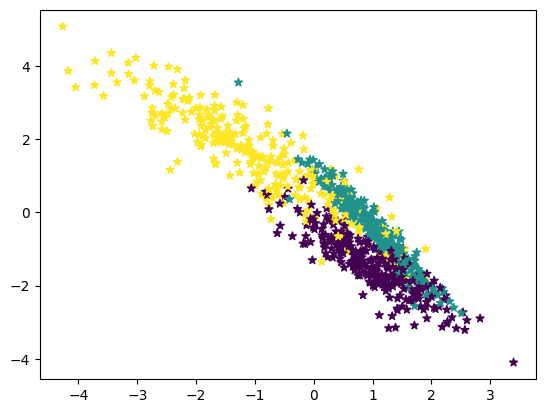

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

División en training y testing

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

Creating training models

In [6]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [7]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


Model evaluation using confusion matrix

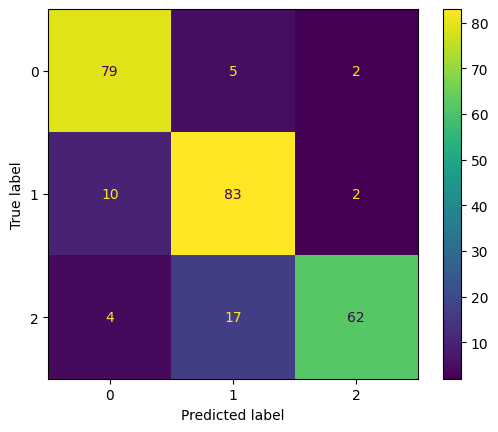

In [8]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Naive Bayes Classifier

Loading data

In [12]:
import pandas as pd
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Data Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      1428 non-null   int64  
 1   purpose            1428 non-null   object 
 2   int.rate           1428 non-null   float64
 3   installment        1428 non-null   float64
 4   log.annual.inc     1428 non-null   float64
 5   dti                1428 non-null   float64
 6   fico               1428 non-null   int64  
 7   days.with.cr.line  1428 non-null   float64
 8   revol.bal          1428 non-null   int64  
 9   revol.util         1428 non-null   float64
 10  inq.last.6mths     1428 non-null   int64  
 11  delinq.2yrs        1428 non-null   int64  
 12  pub.rec            1428 non-null   int64  
 13  not.fully.paid     1428 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 156.3+ KB


Loading Data

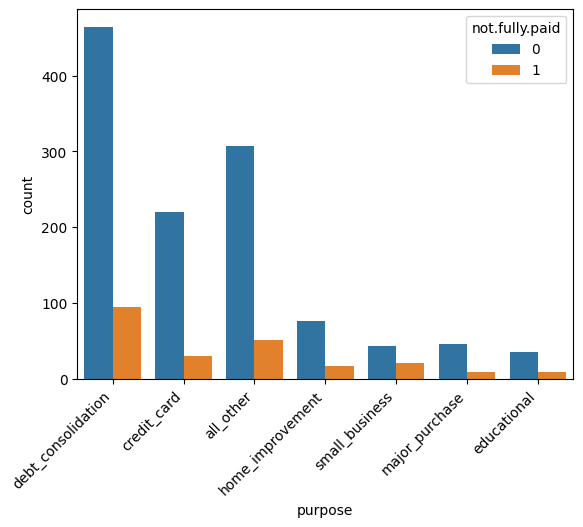

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

Processing data

In [16]:
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [17]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

Model Evaluation Script

In [20]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7923728813559322
F1 Score: 0.8251441989705616


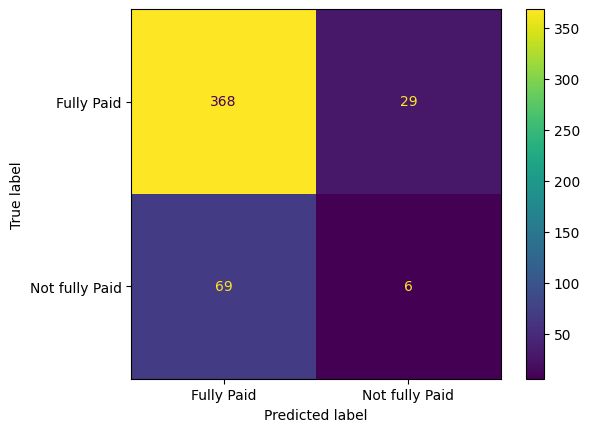

In [21]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

True positive: 368
False negative: 29
False positive: 69
True negative: 6

✅ True Positive (TP): Represents the number of instances that were correctly classified as positive by the model. In this case, there are 368 cases that were positive, and the model correctly identified them as positive.

⛔ False Negative (FN): Indicates the number of instances that are actually positive but that the model incorrectly classified as negative. Here, there are 29 cases that are positive, but the model incorrectly classified them as negative.

⛔ False Positive (FP): Refers to the number of instances that are actually negative but that the model incorrectly classified as positive. There are 69 cases that are negative, but the model incorrectly classified them as positive.

✅ True Negative (TN): Represents the number of instances that were correctly classified as negative by the model. In this case, there are 6 cases that were negative, and the model correctly identified them as negative.

Otimize GaussianNB model

Hyperparameter tuning

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

gs_NB.best_params_

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

# Create the Gaussian Naive Bayes model
model = GaussianNB()

# Define the parameters to tune
params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}

# Configure GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model,
                           param_grid=params_NB,
                           cv=5,  # You can adjust the number of cross-validation folds
                           scoring='accuracy',
                           verbose=1)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

# Print metrics
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("F1 Score:", f1)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'var_smoothing': 0.8111308307896871}
Accuracy: 0.8347457627118644
F1 Score: 0.7653442674286608
